In [2]:
# Extra imports for this lab that are beyond the scope of discussion
import os
import gc
import traceback
import warnings
from pdb import set_trace

# Set this to True if you DO NOT want to run the 
# garbage_collect() functions throughout the notebook
turn_off_garbage_collect = False

def garbage_collect(vars_):
    if not turn_off_garbage_collect:
        for v in vars_:
            if v in globals():
                del globals()[v]
        collected = gc.collect()

        
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts):
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    print("Your code PASSED the code check!")

Predicted global emissions for the next 5 years:
37: 38.67 billion tonnes
38: 39.19 billion tonnes
39: 39.72 billion tonnes
40: 40.24 billion tonnes
41: 40.77 billion tonnes


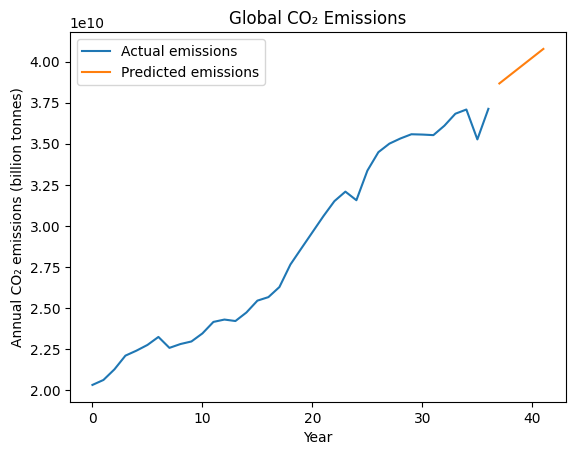

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("annual-co2-emissions-per-country.csv")

# Filter data for the world and years 1985-2028
df = df[(df.Entity == 'World') & (df.Year >= 1985) & (df.Year <= 2028)]
df = df[['Year', 'Annual CO₂ emissions']]

# Create a feature for the years since the first year in the dataset
df['Year'] = df['Year'] - df['Year'].min()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Year'], df['Annual CO₂ emissions'], test_size=0.2)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Predict emissions for the next 5 years
future_years = pd.Series(range(df['Year'].max() + 1, df['Year'].max() + 6))
future_emissions = pd.Series(model.predict(future_years.values.reshape(-1, 1)))

# Print the predicted emissions for the next 5 years
print("Predicted global emissions for the next 5 years:")
for year, emissions in zip(future_years, future_emissions):
    print("{}: {:.2f} billion tonnes".format(year, emissions / 1e9))

# Plot the predicted global CO2 emissions over time
years = df['Year'] + df['Year'].min()
emissions = df['Annual CO₂ emissions']
plt.plot(years, emissions, label='Actual emissions')
plt.plot(future_years, future_emissions, label='Predicted emissions')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions (billion tonnes)')
plt.title('Global CO₂ Emissions')
plt.legend()
plt.show()